In [1]:
import json
import matplotlib.pyplot as plt

def plot_training_log(json_file, plot_title):
    with open(json_file, 'r') as f:
        logs = json.load(f)

    steps = []
    train_losses = []
    val_steps = []
    val_losses = []

    for entry in logs:
        # Extract training step/loss
        if "Step" in entry and "Loss" in entry:
            steps.append(int(entry["Step"]))
            train_losses.append(float(entry["Loss"]))
        # Extract validation loss: done at every 451th step
        elif (
            "message" in entry
            and "Validation Loss" in entry["message"]
        ):
            msg = entry["message"]
            # Extract validation loss
            import re
            loss_match = re.search(r"Validation Loss: ([\d.]+)", msg)
            if loss_match:
                val_losses.append(float(loss_match.group(1)))
                # Find the nearest step number
                if steps:
                    val_steps.append(steps[-1]) # The last logged step before validation

    # Plot training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(steps, train_losses, label="Training Loss")
    plt.plot(val_steps, val_losses, label="Validation Loss")
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(plot_title)
    plt.tight_layout()
    plt.ylim(0, 3)
    plt.grid(True)
    plt.show()

In [2]:
import json
import matplotlib.pyplot as plt

def plot_training_log(json_file, plot_title):
    with open(json_file, 'r') as f:
        logs = json.load(f)

    steps = []
    train_losses = []
    val_steps = []
    val_losses = []

    for entry in logs:
        # Extract training step/loss
        if "Step" in entry and "Loss" in entry:
            steps.append(int(entry["Step"]))
            train_losses.append(float(entry["Loss"]))
        # Extract validation loss
        elif (
            "message" in entry
            and "Validation Loss" in entry["message"]
        ):
            import re
            msg = entry["message"]
            loss_match = re.search(r"Validation Loss: ([\d.]+)", msg)
            if loss_match:
                val_losses.append(float(loss_match.group(1)))
                # Find the nearest step number
                if steps:
                    val_steps.append(steps[-1]) # The last logged step before validation

    # Convert steps to epochs (1 epoch = 432 steps)
    steps_epochs = [s / 432 for s in steps]
    val_steps_epochs = [s / 432 for s in val_steps]

    # Plot training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(steps_epochs, train_losses, label="Training Loss")
    plt.plot(val_steps_epochs, val_losses, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(plot_title)
    plt.tight_layout()
    plt.ylim(0, 3)
    plt.grid(True)
    plt.show()

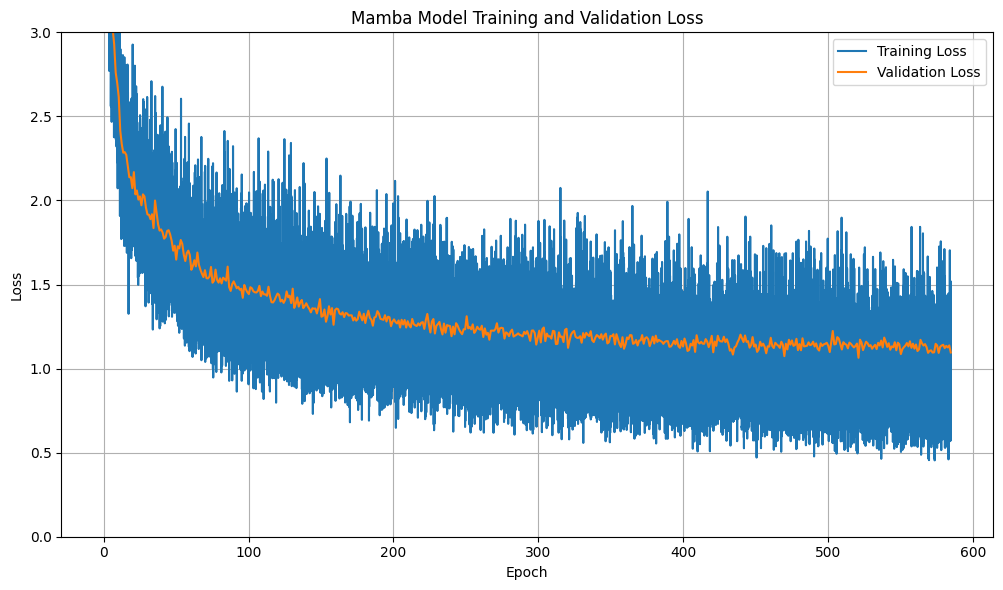

In [6]:
plot_training_log("/scratch/s203861/logs/training_log_mamba.json", "Mamba Model Training and Validation Loss")


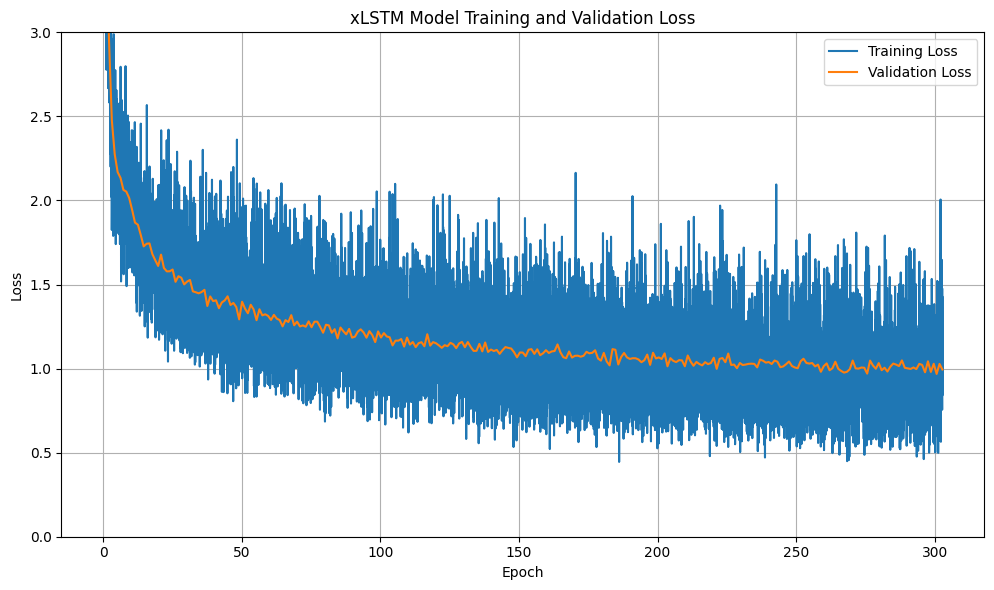

In [3]:
plot_training_log("/scratch/s203861/logs/training_log_xlstm.json", "xLSTM Model Training and Validation Loss")

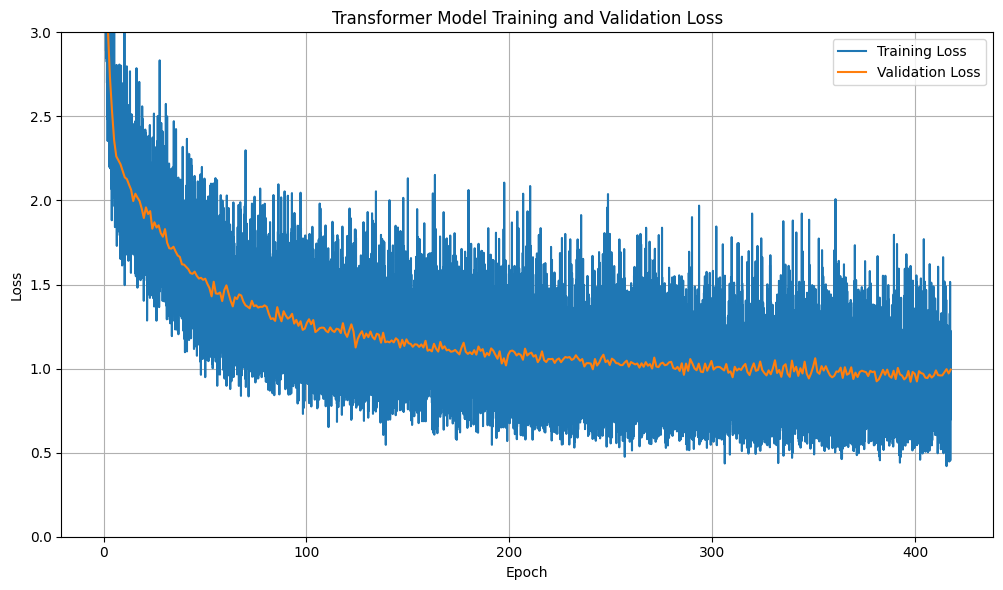

In [8]:
plot_training_log("/scratch/s203861/logs/training_log_transformer.json", "Transformer Model Training and Validation Loss")

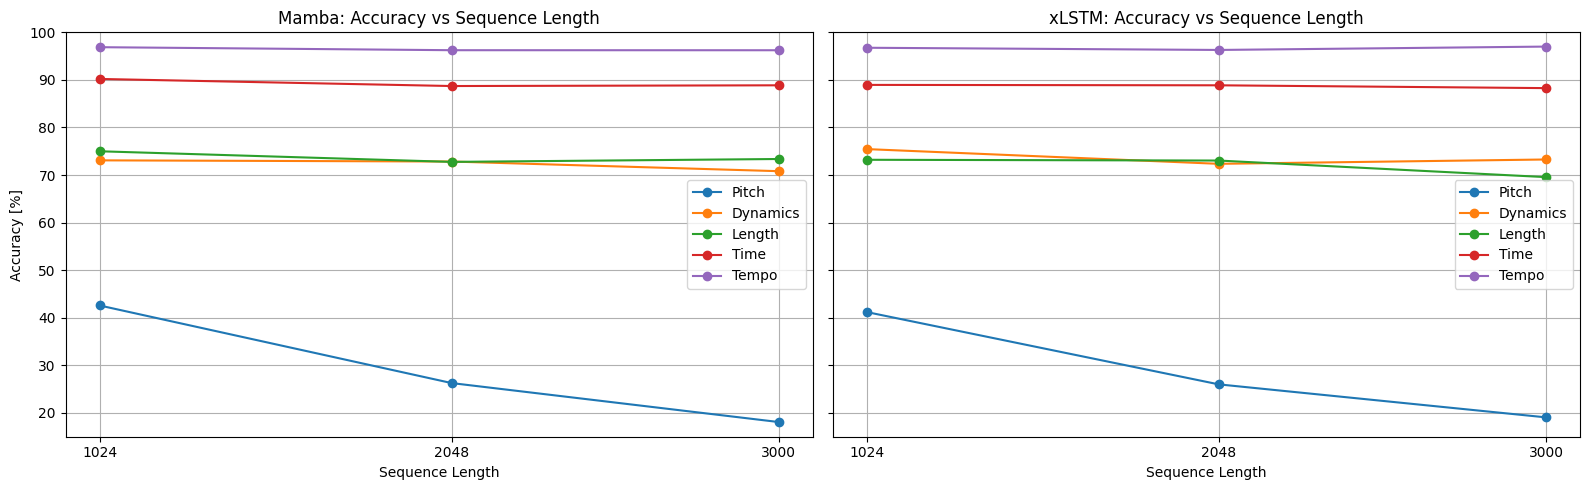

In [8]:
import matplotlib.pyplot as plt

def plot_metrics_modelwise_side_by_side():
    data = {
        1024: {
            'Mamba':     {'pitch': 0.4258517034068136, 'dynamics': 0.7309184993531694, 'length': 0.75, 'time': 0.902027027027027, 'tempo': 0.9687814702920443},
            'xLSTM':     {'pitch': 0.4120374492100421, 'dynamics': 0.7545691906005222, 'length': 0.7321248741188319, 'time': 0.8895131086142322, 'tempo': 0.9675834970530451},
        },
        2048: {
            'Mamba':     {'pitch': 0.2627627627627628, 'dynamics': 0.7284299858557284, 'length': 0.7276785714285714, 'time': 0.8871287128712871, 'tempo': 0.9624309392265193},
            'xLSTM':     {'pitch': 0.26004382761139516, 'dynamics': 0.7236111111111111, 'length': 0.7305045871559633, 'time': 0.8886597938144329, 'tempo': 0.9629629629629629},
        },
        3000: {
            'Mamba':     {'pitch': 0.18081180811808117, 'dynamics': 0.7081339712918661, 'length': 0.7337662337662337, 'time': 0.8886554621848739, 'tempo': 0.9623529411764706},
            'xLSTM':     {'pitch': 0.19068056407112202, 'dynamics': 0.7327327327327328, 'length': 0.6956521739130435, 'time': 0.8827433628318584, 'tempo': 0.9700374531835206},
        }
    }

    models = ['Mamba', 'xLSTM']
    metrics = ['pitch', 'dynamics', 'length', 'time', 'tempo']
    lengths = [1024, 2048, 3000]

    fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
    for ax, model in zip(axes, models):
        for metric in metrics:
            y = []
            x = []
            for length in lengths:
                if model in data.get(length, {}) and metric in data[length][model]:
                    x.append(length)
                    y.append(data[length][model][metric] * 100)
            if y:
                ax.plot(x, y, marker='o', label=metric.capitalize())
        ax.set_title(f"{model}: Accuracy vs Sequence Length")
        ax.set_xlabel("Sequence Length")
        ax.set_ylabel("Accuracy [%]" if model == models[0] else "")
        ax.set_ylim(15, 100)
        ax.set_xticks(lengths)
        ax.grid(True)
        ax.legend()
    plt.tight_layout()
    plt.show()

# Usage:
plot_metrics_modelwise_side_by_side()